# word2vec

## Introduction

Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. The Word2Vec model is composed of two distinct models, the Continuous Bag-of-Words (CBOW) model and the Skip-Gram model. Both models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. The CBOW model predicts the current word based on the context, while the Skip-Gram model predicts surrounding words given the current word. In this notebook, we will use the Skip-Gram model.

## In this notebook

In this notebook, we implement a toy example of word2vec (from scratch) using the Skip-Gram model.


## Tokenization

We begin by defining a simple corpus and tokenizing it.

In [1]:
# Add some text to the corpus, which is taken from the Wikipedia page on the word2vec algorithm
corpus = 'Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.'
# Add some more text to the corpus
corpus += 'The purpose and usefulness of word embeddings are to group similar words together and to be able to compare words and assess their similarities. Word embeddings are widely used in natural language processing and machine learning because they capture the semantic meaning of the words, as well as syntactic information. Word embeddings are the basis of the state-of-the-art models used in natural language processing tasks, such as named entity recognition, part-of-speech tagging, and machine translation.'
# Add some more text to the corpus
corpus += 'The word2vec algorithm uses a continuous bag-of-words (CBOW) model or a continuous skip-gram model to learn the word embeddings from the text. The CBOW model predicts the current word from a window of surrounding context words, while the skip-gram model predicts surrounding context words given the current word. The word2vec algorithm can be trained on a corpus of text to learn word embeddings, which can then be used to perform a variety of natural language processing tasks.'
# Add some more text to the corpus
corpus += 'The word2vec algorithm is computationally efficient and can process large corpora of text in a reasonable amount of time. The algorithm has been shown to produce high-quality word embeddings that capture the semantic meaning of the words. The word embeddings produced by the word2vec algorithm have been shown to be useful for a wide range of natural language processing tasks, such as named entity recognition, part-of-speech tagging, and machine translation.'
# Add some more text to the corpus
corpus += 'The word2vec algorithm has been widely adopted in the natural language processing and machine learning communities, and has become a standard method for learning word embeddings. The word2vec algorithm has been used to improve the performance of natural language processing tasks, such as named entity recognition, part-of-speech tagging, and machine translation. The word embeddings produced by the word2vec algorithm have been shown to capture the semantic meaning of the words, as well as syntactic information, and have been used to improve the performance of a wide range of natural language processing tasks.'
# Add some more text to the corpus
corpus += 'The word2vec algorithm has been used to improve the performance of natural language processing tasks, such as named entity recognition, part-of-speech tagging, and machine translation. The word embeddings produced by the word2vec algorithm have been shown to capture the semantic meaning of the words, as well as syntactic information, and have been used to improve the performance of a wide range of natural language processing tasks. The word2vec algorithm has been widely adopted in the natural language processing and machine learning communities, and has become a standard method for learning word embeddings.'

# Tokenize the corpus (code taken from https://jaketae.github.io/study/word2vec/)
import re
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())
tokenized_corpus = tokenize(corpus)

# Create lookup table
word_lookup = {word: i for i, word in enumerate(set(tokenized_corpus))}
index_lookup = {i: word for word, i in word_lookup.items()}

# Print out some information about the corpus
print('Number of unique words:', len(word_lookup))
print('Length of tokenized corpus:', len(tokenized_corpus))
print(tokenized_corpus)

Number of unique words: 143
Length of tokenized corpus: 517
['word2vec', 'is', 'a', 'group', 'of', 'related', 'models', 'that', 'are', 'used', 'to', 'produce', 'word', 'embeddings', 'these', 'models', 'are', 'shallow', 'two', 'layer', 'neural', 'networks', 'that', 'are', 'trained', 'to', 'reconstruct', 'linguistic', 'contexts', 'of', 'words', 'word2vec', 'takes', 'as', 'its', 'input', 'a', 'large', 'corpus', 'of', 'text', 'and', 'produces', 'a', 'vector', 'space', 'typically', 'of', 'several', 'hundred', 'dimensions', 'with', 'each', 'unique', 'word', 'in', 'the', 'corpus', 'being', 'assigned', 'a', 'corresponding', 'vector', 'in', 'the', 'space', 'word', 'vectors', 'are', 'positioned', 'in', 'the', 'vector', 'space', 'such', 'that', 'words', 'that', 'share', 'common', 'contexts', 'in', 'the', 'corpus', 'are', 'located', 'in', 'close', 'proximity', 'to', 'one', 'another', 'in', 'the', 'space', 'the', 'purpose', 'and', 'usefulness', 'of', 'word', 'embeddings', 'are', 'to', 'group', 'sim

## Implement sub-sampling

Sub-sampling is a technique used to remove some of the most frequent words such as "the", "is", "in", etc. The idea is to remove some of the most frequent words to speed up the training.

In [2]:
# Import numpy for random number generation
import numpy as np

# Implement subsampling but keep most words
def subsample_frequent_words(corpus, threshold):
    word_counts = {word: sum(1 for w in corpus if w == word) for word in word_lookup}
    total_count = sum(word_counts.values())
    word_freqs = {word: count/total_count for word, count in word_counts.items()}
    p_drop = {word: 1 - np.sqrt(threshold / word_freqs[word]) for word in word_counts}
    subsampled_corpus = [word for word in corpus if np.random.random() < (1 - p_drop[word])]
    return subsampled_corpus

subsampled_corpus = subsample_frequent_words(tokenized_corpus, 1e-1)

# Print how many words were removed
print('Length of subsampled corpus:', len(subsampled_corpus))
print('Number of words removed:', len(tokenized_corpus) - len(subsampled_corpus))

Length of subsampled corpus: 517
Number of words removed: 0


## Generating training data

Next, we generate the training data for the Skip-Gram model. In the Skip-Gram model, we aim to predict the center word based on the context words. The context words are the words that are within a fixed-size window around the center word. The size of the window is a hyperparameter of the model and is typically set to 2-10. The training data for the Skip-Gram model is generated by sliding a window of size $2C+1$ over the sentence. The label corresponds to the center word, and the features correspond to the context words. For example, if we set the context window size to 2, then the context words for the sentence "the quick brown fox jumps over the lazy dog" are as follows:

- ('quick', 'the'), ('brown', 'the')
- ('the', 'quick'), ('brown', 'quick'), ('fox', 'quick')
- ('the', 'brown'), ('quick', 'brown'), ('fox', 'brown'), ('jumps', 'brown')
- etc.

We one-hot encode the context words and the center words.

In [3]:
# Function to create one-hot encoding
def one_hot_encode(idx):
    one_hot = [0] * len(word_lookup)
    one_hot[idx] = 1
    return one_hot

# Fix window size
window_size = 3

# Create training data
X = []
y = []
for i in range(len(tokenized_corpus)):
    for j in range(max(0, i - window_size), min(len(tokenized_corpus), i + window_size + 1)):
        if i != j:
            X.append(one_hot_encode(word_lookup[tokenized_corpus[j]]))
            y.append(one_hot_encode(word_lookup[tokenized_corpus[i]]))

# Convert to numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [9]:
word = 'natural'

print(word_lookup[word])
print(one_hot_encode(word_lookup[word]))


51
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1


## Training

Given the training dataset, we want to train our embedding layer. Our model is a simple 2-layer neural network. Given a datapoint $x$, the model outputs $\mathrm{softmax}(x^{T}W_{1}W_{2})$ where 
- $x$ is the one-hot encoded vector of the context word of size $V$ (the size of the vocabulary)
- $W_{1}$ is the $V\times N$ weight matrix of the embedding layer
- $W_{2}$ is a $N\times V$ weight matrix
- $N$ is the size of the embedding
- $\mathrm{softmax}$ is the softmax function
- The output of the model is a vector of size $V$ where the $i$-th entry is the probability of the center word being the $i$-th word in the vocabulary.


100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


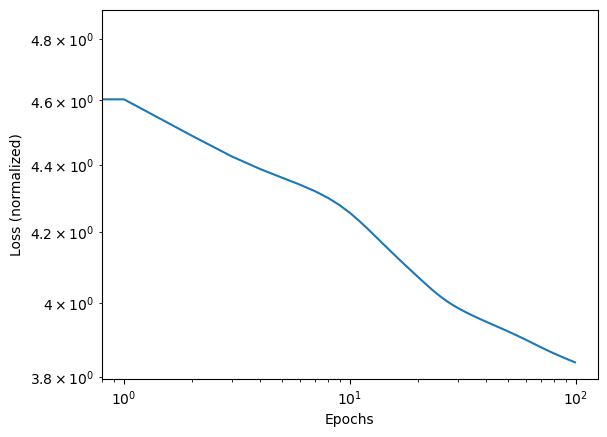

In [7]:
# Import tqdm for progress bar
from tqdm import tqdm

# Define the model
class Word2Vec:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.rand(embedding_dim, vocab_size)
        self.W2 = np.random.rand(vocab_size, embedding_dim)
        self.lr = 0.01
        self.losses = []

    def feed_forward(self, X):
        self.h = np.dot(self.W1, X)
        self.u = np.dot(self.W2, self.h)
        self.y_c = self.softmax(self.u)

    def backprop(self, x, y):
        e = self.y_c - y
        dW2 = np.outer(e, self.h)
        dW1 = np.outer(self.W2.T @ e, x)
        self.W1 = self.W1 - (self.lr * dW1)
        self.W2 = self.W2 - (self.lr * dW2)

    def train(self, X, y):
        # In practice, we would use negative sampling
        for i in tqdm(range(100)):
            loss = 0
            for j in range(len(X)):
                self.feed_forward(X[j])
                self.backprop(X[j], y[j])
                loss += -np.log(self.y_c[y[j] == 1]) / len(y)
            self.losses.append(loss)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def word_vec(self, word):
        return self.W1[:, word_lookup[word]]

    def vec_word(self, vec):
        return index_lookup[np.argmax(np.dot(self.W1, vec))]    
    
# Train the model
model = Word2Vec(len(word_lookup), 3)
model.train(X, y)

# Plot the loss
import matplotlib.pyplot as plt
plt.plot(np.arange(len(model.losses)),model.losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (normalized)')
plt.yscale('log')
plt.xscale('log')

## Testing

We can test the model by computing the cosine similarity between the word vectors. We can also use the word vectors to find the most similar words to a given word.

In [5]:
# Compute the cosine similarity between two vectors
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Find similar words
def find_similar_words(vec, n=5):
    similarities = []
    for i in range(len(word_lookup)):
        similarities.append((index_lookup[i], cosine_similarity(vec, model.word_vec(index_lookup[i]))))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:n]

# Test the model

# Choose some words
words = ['language', 'word2vec', 'embeddings']
for word in words:
    vec = model.word_vec(word)
    similar_words = find_similar_words(vec)
    print('Similar words to', word, ':', similar_words)

Similar words to language : [('language', 0.9999999999999999), ('of', 0.9987119285864424), ('natural', 0.9857291365553068), ('input', 0.9748826378123472), ('surrounding', 0.9694205565852837)]
Similar words to word2vec : [('word2vec', 1.0000000000000002), ('for', 0.9995322944027581), ('by', 0.992158716200454), ('is', 0.9917406471563089), ('has', 0.9897457650390871)]
Similar words to embeddings : [('embeddings', 1.0), ('capture', 0.999201327899488), ('adopted', 0.9983594882702788), ('widely', 0.9957650324951606), ('word', 0.9914647197705436)]


## Plotting

We can plot the word vectors.

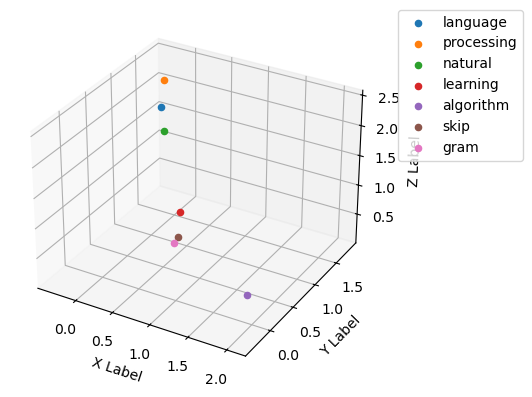

In [6]:
# Plot the words vectors in 3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the less similar words
for word in ['language', 'processing', 'natural', 'learning', 'algorithm', 'skip', 'gram']:
    vec = model.word_vec(word)
    ax.scatter(vec[0], vec[1], vec[2], label=word)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Put legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# GLoVe

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. GloVe is designed in such a way that the word vectors can be used to find the most similar words to a given word.

## In this notebook

In this notebook, we implement a toy example of GloVe (from scratch).

## Generating the co-occurrence matrix

The first step in GloVe is to generate the co-occurrence matrix. The co-occurrence matrix is a matrix of size $V\times V$ where $V$ is the size of the vocabulary. The entry $X_{ij}$ of the matrix is the number of times word $j$ appears in the context of word $i$.

In [14]:
# Generate the co-occurrence matrix
def generate_co_occurrence_matrix(corpus, window_size):
    co_occurrence_matrix = np.zeros((len(word_lookup), len(word_lookup)))
    for i in range(len(corpus)):
        for j in range(max(0, i - window_size), min(len(corpus), i + window_size + 1)):
            if i != j:
                co_occurrence_matrix[word_lookup[corpus[i]], word_lookup[corpus[j]]] += 1
    return co_occurrence_matrix

# Generate the co-occurrence matrix
co_occurrence_matrix = generate_co_occurrence_matrix(subsampled_corpus, window_size)

# Print the co-occurrence matrix
print(f'Co-occurrence matrix has shape: {co_occurrence_matrix.shape}')
print(np.sum(X != 0))
print(X.shape[0]*X.shape[1])

Co-occurrence matrix has shape: (143, 143)
3090
441870
